In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
_, label = torch.load("data/weibo_200_gpt.pth", map_location="cpu")
df = pd.DataFrame(label, columns=["O", "C", "A", "E", "N"])

In [2]:
counts = df.apply(pd.value_counts).fillna(0)
counts

,O,C,A,E,N
0,3,19,18,6,28
1,20,63,25,29,28
2,135,76,115,123,102


In [18]:
[[1 - counts[j][i] / (counts[0][j] + counts[1][j] + counts[2][j]) for j in counts.columns] for i in counts.index]

[[0.9810126582278481, 0.8734177215189873, 0.14556962025316456],
 [0.879746835443038, 0.6012658227848101, 0.5189873417721519],
 [0.8860759493670887, 0.8417721518987342, 0.2721518987341772],
 [0.9620253164556962, 0.8164556962025317, 0.2215189873417721],
 [0.8227848101265822, 0.8227848101265822, 0.35443037974683544]]

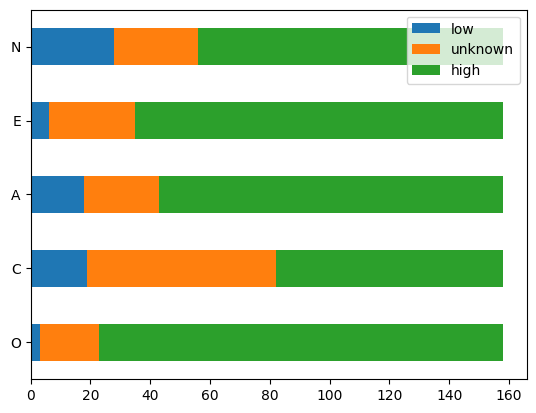

In [3]:
counts = counts.transpose()
counts.plot(kind='barh', stacked=True)
plt.legend(["low", "unknown", "high"])
plt.show()